### Упражнение 1. Списки с одинаковым содержимым

Определите, содержат ли списки $A$ и $B$ из одинаковые наборы элементов.


#### Пример

| <font size=3>Входные последовательности</font> | <font size=3>Выходная последовательность</font> |
| :---: | :---: |
| <font size=3>1 3 1<br>1 1 3</font> | <font size=3>True</font> |
| <font size=3>1 3 1<br>1 3 3</font> | <font size=3>False</font> |

In [1]:
import random
alphabet = list(range(5))
N = 20
A = [random.choice(alphabet) for _ in range(N)]
if random.randint(0, 2):
    B = [random.choice(alphabet) for _ in range(N)]
else:
    B = random.shuffle(A)

In [2]:
# Сравним отсортированные списки

A_sorted = sorted(A)
B_sorted = sorted(B)

print(A_sorted == B_sorted)

False


### Упражнение 2. Наиболее близкие точки

Дан список $A$ различных точек на коорднатной прямой. Распечатайте все пары точек, расстояние между которыми минимально.

In [80]:
import random
N = random.randint(10, 20)
A = random.sample(range(100), N)

In [65]:
A_sorted = sorted(A)
pairs = [(A_sorted[0], A_sorted[1])]
min_dist = A_sorted[1] - A_sorted[0]

for i in range(1, len(A_sorted) - 1):
    
    if A_sorted[i+1] - A_sorted[i] == min_dist:
        pairs.append((A_sorted[i], A_sorted[i+1]))
        
    if A_sorted[i+1] - A_sorted[i] < min_dist:
        min_dist = A_sorted[i+1] - A_sorted[i]
        pairs = [(A_sorted[i], A_sorted[i+1])]

print(A_sorted)
print(pairs)

[11, 16, 17, 18, 24, 29, 35, 36, 44, 47, 53, 56, 57, 59, 74, 76, 92, 98]
[(16, 17), (17, 18), (35, 36), (56, 57)]


### Упражнение 3. Треугольники

Заданы $N$ попарно разлиных длин отрезков. Вычислить количество способов, которыми из этих отрезков можно сложить треугольник. Возможно ли, чтобы алгоритм работал с эффективностью $O(N^2)$?

In [2]:
import random
N = random.randint(10, 20)
A = random.sample(range(100), N)

In [11]:
# Brute force algorithm
count = 0
triangles = []
N = len(A)

# Переберем все возможные тройки отрезков и проверим возможность построить треугольник
for i in range(N - 2):
    for j in range(i + 1, N - 1):
        for k in range(j + 1, N):
            # Проверим возможность построить треугольник
            if (A[i] + A[j] > A[k]) and (A[i] + A[k] > A[j]) and (A[j] + A[k] > A[i]):
                count += 1
                triangles.append((A[i], A[j], A[k]))

In [28]:
# slightly better algorithm
count2 = 0
triangles2 = []
N = len(A)

A_sorted = sorted(A, reverse=True)
for i in range(N - 2):
    
    for j in range(i + 1, N - 1):
        # Выйдем из цикла, если длина второго отрезка <= длины первого отрезка
        if A_sorted[j] <= A_sorted[i] / 2:
            break
            
        for k in range(j + 1, N):
            # Если нельзя построить треугольник, выходим из цикла
            if (A_sorted[j] + A_sorted[k] <= A_sorted[i]):
                break
                
            count2 += 1
            triangles2.append((A_sorted[i], A_sorted[j], A_sorted[k]))

### Упражнение 4. Сортировка расческой

Напишите функцию, сортирующую функцию с помощью алгоритма сортировки [расческой](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D1%80%D0%B0%D1%81%D1%87%D1%91%D1%81%D0%BA%D0%BE%D0%B9)

In [83]:
def comb_sort(A):
    
    gap = len(A)
    decr_fact = 1.247
    Sorted = False
    
    while Sorted == False:
        
        print(A, gap)
        gap = int(gap / decr_fact)
        if gap <= 1:
            gap = 1
            Sorted = True
        
        # A single "comb" over the input list
        i = 0
        while i + gap < len(A):
            if A[i] > A[i + gap]:
                A[i], A[i + gap] = A[i + gap], A[i]
                Sorted = False
            i += 1
    
    return A

In [87]:
# A = [6, 11, 18, 19, 21, 23, 31, 35, 44, 54, 59, 63, 65, 66, 69, 76, 89]

comb_sort(A)

[94, 75, 70, 56, 93, 14, 19, 17, 95, 61, 5, 82, 64, 2, 13] 15
[64, 2, 13, 56, 93, 14, 19, 17, 95, 61, 5, 82, 94, 75, 70] 12
[61, 2, 13, 56, 75, 14, 19, 17, 95, 64, 5, 82, 94, 93, 70] 9
[17, 2, 13, 5, 75, 14, 19, 61, 95, 64, 56, 82, 94, 93, 70] 7
[14, 2, 13, 5, 64, 17, 19, 61, 93, 70, 56, 82, 94, 95, 75] 5
[14, 2, 13, 5, 64, 17, 19, 61, 93, 70, 56, 82, 94, 95, 75] 4
[5, 2, 13, 14, 61, 17, 19, 56, 82, 70, 64, 75, 94, 95, 93] 3
[5, 2, 13, 14, 19, 17, 61, 56, 64, 70, 82, 75, 93, 95, 94] 2
[2, 5, 13, 14, 17, 19, 56, 61, 64, 70, 75, 82, 93, 94, 95] 1


[2, 5, 13, 14, 17, 19, 56, 61, 64, 70, 75, 82, 93, 94, 95]

### Упражнение 5. Сортировка Шелла

Напишите функцию, сортирующую список с помощью алгоритма сортировки [Шелла](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%A8%D0%B5%D0%BB%D0%BB%D0%B0). Добавьте возможность изменения длины промежутка согласно последовательностям Седжвика и Пратта.

In [136]:
def Sedgewick_gaps(n):
    d = []
    i = 0
    while True:
        
        if i % 2 == 0:
            d_i = 9 * (2**i - 2**(i/2)) + 1 
        else:
            d_i = 8 * 2**i - 6 * 2**((i + 1) / 2) + 1
        
        if d_i >= n:
            break
        d.append(int(d_i))
        i += 1
    
    return sorted(d, reverse=True)

Sedgewick_gaps(200)

[109, 41, 19, 5, 1]

In [138]:
from math import log

def Pratt_gaps(n):
    d = []
    
    for i in range(int(log(n, 2))):
        for j in range(int(log(n, 3))):
            
            d_i = 2**i * 3**j
            if d_i > n/2:
                break
            d.append(d_i)
    
    return sorted(d, reverse=True)

Pratt_gaps(40)

[18, 16, 12, 9, 8, 6, 4, 3, 2, 1]

In [144]:
def shell_sort(A, gaps = "Sedgewick"):

    if gaps == "Sedgewick":
        gaps = Sedgewick_gaps(len(A))
    elif gaps == "Pratt":
        gaps = Pratt_gaps(len(A))
    else:
        raise Exception("Try another gaps method")
    

    # Start with the largest gap and work down to a gap of 1
    for gap in gaps:

        # Do a gapped insertion sort for this gap size.
        # The first gap elements a[0..gap-1] are already in gapped order
        # keep adding one more element until the entire array is gap sorted
        for i in range(gap, len(A), 1):
            
            print(A, gap)
            
            # add a[i] to the elements that have been gap sorted
            # save a[i] in temp and make a hole at position i
            temp = A[i]
            # shift earlier gap-sorted elements up until the correct location for a[i] is found
            j = i
            while j >= gap and A[j - gap] > temp:
                A[j] = A[j - gap]
                j = j - gap
                
            # put temp (the original a[i]) in its correct location
            A[j] = temp
    
    return A

In [151]:
N = random.randint(10, 20)
A = random.sample(range(100), N)

shell_sort(A, gaps = "Pratt")

[83, 48, 94, 66, 62, 64, 42, 69, 73, 5, 23, 79, 74, 61, 72, 55, 33] 8
[73, 48, 94, 66, 62, 64, 42, 69, 83, 5, 23, 79, 74, 61, 72, 55, 33] 8
[73, 5, 94, 66, 62, 64, 42, 69, 83, 48, 23, 79, 74, 61, 72, 55, 33] 8
[73, 5, 23, 66, 62, 64, 42, 69, 83, 48, 94, 79, 74, 61, 72, 55, 33] 8
[73, 5, 23, 66, 62, 64, 42, 69, 83, 48, 94, 79, 74, 61, 72, 55, 33] 8
[73, 5, 23, 66, 62, 64, 42, 69, 83, 48, 94, 79, 74, 61, 72, 55, 33] 8
[73, 5, 23, 66, 62, 61, 42, 69, 83, 48, 94, 79, 74, 64, 72, 55, 33] 8
[73, 5, 23, 66, 62, 61, 42, 69, 83, 48, 94, 79, 74, 64, 72, 55, 33] 8
[73, 5, 23, 66, 62, 61, 42, 55, 83, 48, 94, 79, 74, 64, 72, 69, 33] 8
[33, 5, 23, 66, 62, 61, 42, 55, 73, 48, 94, 79, 74, 64, 72, 69, 83] 6
[33, 5, 23, 66, 62, 61, 42, 55, 73, 48, 94, 79, 74, 64, 72, 69, 83] 6
[33, 5, 23, 66, 62, 61, 42, 55, 73, 48, 94, 79, 74, 64, 72, 69, 83] 6
[33, 5, 23, 66, 62, 61, 42, 55, 73, 48, 94, 79, 74, 64, 72, 69, 83] 6
[33, 5, 23, 48, 62, 61, 42, 55, 73, 66, 94, 79, 74, 64, 72, 69, 83] 6
[33, 5, 23, 48, 62, 

[5, 23, 33, 42, 48, 55, 61, 62, 64, 66, 69, 72, 73, 74, 79, 83, 94]

### Упражнение 6. Экспериментальая оценка временной сложности алгоритма

Проверьте, верны ли для реализованных Вами алгоритмов их теоретические временные сложности. Исследуйте сортировки выбором, пузырьком, вставками, расческой. Исследуйте сортировку Шелла в вариантах с последовательностями Седжвика, Пратта и в оригинальном варианте с делением длины промежутка пополам.

Для того чтобы убедиться в том, что тестируемая сложность $O(f(N))$ подходит, надо изучить зависимость отношения $\frac{T(N)}{f(N)}$ от $N$. Если $\displaystyle\lim_{N\to \infty}\frac{T(N)}{f(N)} = С$, где $C > 0$, то сложность алгоритма не превосходит $O(f(N))$. Если $C > 0$, то сложность алгоритма - $O(f(N))$.

Для квадратичных сортировок брать значения $N$, превышающие $10^5$ не следует, так как сортировка будет занимать слишком много времени. У меня сортировка пузырьком списка, состоящего из $10^5$ целых чисел заняла почти 15 мин.

Для измерения времени сортировки используйте модуль [`timeit`](https://docs.python.org/3/library/timeit.html). Аргумент `stmt` функции `timeit.timeit()` содержит код, выполняемый `number` раз, после чего вычисляется среднее время его выполнения. Аргумент `setup` содержит код, который выполняется **1** раз до повторных запусков `stmt`. С помощью аргумента `globals` в `timeit.timeit()` передаются имена, необходимые для успешного выполнения `stmt` и `setup`. 

Обратите внимание, что в `stmt` инициализируется список `a`. Если этого не делать, то начиная со второго повторения `a` будет упорядочен до сортировки.

Ниже приведен пример измерения времени сортировки с помощью метода `list.sort()`. Встроенная сортировка Python использует алгоритм [timsort](https://ru.wikipedia.org/wiki/Timsort), который сочетает в себе сортировки вставками и слиянием. Теоретическая сложность алгоритма $O(N \cdot \log N)$, однако у меня получилось, что сложность алгоритма ближе к $O(N \cdot \log ^2 N)$

In [36]:
import timeit
import math
import matplotlib.pyplot as plt

%matplotlib inline

8 length done
16 length done
32 length done
64 length done
128 length done
256 length done
512 length done
1024 length done
2048 length done
4096 length done
8192 length done
16384 length done
32768 length done
65536 length done
131072 length done
262144 length done
524288 length done
1048576 length done
2097152 length done
4194304 length done
8388608 length done
16777216 length done
33554432 length done


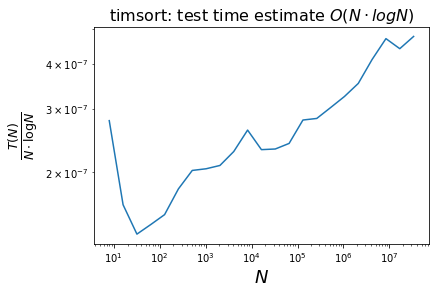

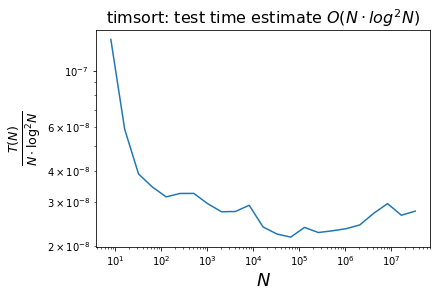

In [38]:
start = 8
factor = 2
num_points = 23
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
nlogn_list = []
nlogn2_list = []
N = N_min
setup = """
import random
L=list(range(N))
random.shuffle(L)
def timsort(l):
    l.sort()
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:];timsort(a)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T -= T_copy
    N_list.append(N)
    T_list.append(T)
    nlogn_list.append(T / (N * math.log(N)))
    nlogn2_list.append(T / (N * math.log(N) ** 2))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(N_list, nlogn_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \log N}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('timsort: test time estimate $O(N \cdot log N)$', fontsize=16)
plt.show()

plt.plot(N_list, nlogn2_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \log^2 N}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('timsort: test time estimate $O(N \cdot log ^2 N)$', fontsize=16)
plt.show()

### Упражнение 7. Слияние

В двух файлах <font color=green>seq1.txt</font>, <font color=green>seq2.txt</font> записаны возрастающие последовательности целых чисел. Объедините эти последовательности в одну возрастающую последовательность и запишите ее в третий файл. Постарайтесь сделать алгоритм однопроходным.

#### Пример

| <font size=3>Входные последовательности</font> | <font size=3>Выходная последовательность</font> |
| :---: | :---: |
| <font size=3>1 3 5 7<br>2 3 4 5 6</font> | <font size=3>1 2 3 3 4 5 5 6 7</font> |

In [40]:
seq_1 = [1, 3, 5, 7]
seq_2 = [2, 3, 4, 5, 6]

def merge(seq_1, seq_2):
    
    merged_seq = []
    i, j = (0, 0)
    while True:
        
        # Если 1-ая посл. еще не кончилась и либо 2 посл. кончилась, либо значение в seq_1 <= чем в seq_2
        if (i < len(seq_1)) and (j == len(seq_2) or seq_1[i] <= seq_2[j]):
            merged_seq.append(seq_1[i])
            i += 1
        
        # Иначе если посл.2 не кончилась
        elif j < len(seq_2):
            merged_seq.append(seq_2[j])
            j += 1
            
        # Если обе последовательности кончились
        else:
            break
    
    return merged_seq

merge(seq_1, seq_2)

[1, 2, 3, 3, 4, 5, 5, 6, 7]

In [39]:
seq_1 = [1, 3, 5, 7]
seq_2 = [2, 3, 4, 5, 6]

# Версия с лекции
def merge2(A, B):
    
    C = [0] * (len(A) + len(B))
    i = k = n = 0
    
    while (i < len(A)) and (k < len(B)):
        if A[i] <= B[k]:
            C[n] = A[i]
            i += 1
            n += 1
        else:
            C[n] = B[k]
            k += 1
            n += 1
    while i < len(A):
        C[n] = A[i]
        i += 1
        n += 1
    while k < len(B):
        C[n] = B[k]
        k += 1
        n += 1
    return C

merge2(seq_1, seq_2)

[1, 2, 3, 3, 4, 5, 5, 6, 7]